<a href="https://colab.research.google.com/github/edujongkook/8w_sbs_python_weekend/blob/main/8w_python_%EA%B8%B0%EC%B4%88_4%EC%A3%BC%EC%B0%A8_%EA%B0%9D%EC%B2%B4%EC%99%80%ED%81%B4%EB%9E%98%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4주차 강의 내용
- random 모듈
- 클래스와 객체지향
- 클래스 임포트하기

소스코드의 bytecode

In [ ]:
def test(a, b):
    c = a + b
    return c


In [ ]:
import dis
dis.dis(test)

# random 모듈 -p211

- random() 함수

In [ ]:
import random

random.random()

- randrange() 함수

In [ ]:
random.randrange(1, 7)

- sample() 함수

In [ ]:
random.sample(range(1,101), 10)  # 중복 없이 샘플을 만듬

- choice() 함수

In [ ]:
rps = ['가위', '바위', '보']
random.choice(rps)
# random.sample(rps, 1) 과 동일

## 로또 프로그램  
일정 범위에서 랜덤숫자를 뽑아내는 random.sample() 를 사용해서  
로또 프로그램을 만들어 봅시다.

 1부터 45까지의 숫자 6개를 랜덤으로 생성

In [ ]:
random.sample(range(1,46), 6)

#### ❓ input_num() 함수를 만들어 봅시다.  
> Q1. 사용자로부터 6번 반복해서 입력을 받아 리스트에 추가해 봅시다.  

> Q2. 입력시 중복되는 숫자가 없도록 코드를 만들어 보세요

> Q3. 입력이 1에서 45까지만 되도록 하려면 어떻게 해야될까요

In [ ]:
def input_num():
    """ 유저로부터 6개의 숫자를 입력받아 리스트를 리턴하는 함수 """

    print('1부터 45까지 숫자를 6개 입력해 주세요')
    input_numbers = []
    while len(input_numbers) < 6:
        num = int(input("숫자를 입력하세요: "))
        if num in input_numbers:
            print('이미 존재하는 번호입니다.')
            continue
        elif num > 45 or num < 1:
            print('1에서 45사이의 숫자를 입력해 주세요')
            continue
        else:
            input_numbers.append(num)
            print(input_numbers)

    return input_numbers

❓ 당첨된 번호 확인  
로또는 6개의 번호를 맞추는 복권입니다.   
랜덤한 숫자 6개를 생성해서 당첨번호를 만들고


>숫자 6개를 입력하면 일치하는   
숫자의 갯수를 출력하는 프로그램을 만들어 봅시다.



In [ ]:
import random
lotto = random.sample(range(1,46), 6)
my_lotto = input_num()
same_numbers = []
for num in my_lotto:
    if num in lotto:
        same_numbers.append(num)
print(f'당첨된 숫자 갯수 : {len(same_numbers)}')
print(same_numbers)

❓ 1등 당첨 시뮬레이션  
자동으로 복권번호를 생성하고 6개가 일치하려면 몇번을 반복해야하는지 알아보는 코드를 만들어봅시다

In [ ]:
import random

lotto = random.sample(range(1,46), 6)
try_count = 0
while True:
    same_lotto = []
    try_count = try_count + 1
    my_lotto = random.sample(range(1,46), 6)
    for n in my_lotto:
        if n in lotto:
            same_lotto.append(n)
    if len(same_lotto) == 6:
        print(my_lotto, try_count)
        break



## 가위, 바위, 보 게임
choice() 함수를 사용해서 가위바위보 게임을 만들어 봅시다.

In [ ]:
while True:
    rps = ['가위', '바위', '보']  # Rock, Paper, Scissors
    my = input('가위, 바위, 보를 중에 하나를 입력하세요 :')

    com = random.choice(rps)
    print(f'컴퓨터 : {com}, 나 : {my}')

    result = check_win(com, my)

    if result == 'my':
        print('나의 승리!')
    elif result == 'com':
        print('컴퓨터 승리 ㅠㅠ')
    elif result == 'draw':
        print('무승부~')

### ❓ check_win(com, my) 함수 만들기
두개의 매개변수 com과 my 를 받아서 결과를 리턴하는 함수   
(각각 매개변수는 '가위', '바위', '보' 중에 하나)  
리턴값 :
>'my' : 유저 승리  
'draw' : 무승부  
'com' : 컴퓨터 승리

In [ ]:
import random

### ⚡ 컬렉션 구조를 이용한 알고리즘

In [ ]:
while True:
    rps = ['가위', '바위', '보']  # Rock, Paper, Scissors
    win_me = {'가위':[0, -1, 1],  # 승리 테이블 (0 : 가위 - 무승부, -1 : 바위 -  패배, 1 : 보 - 승리)
              '바위':[1, 0, -1],
              '보':[-1, 1, 0]}
    me = input('가위, 바위, 보 중에 하나를 입력하세요 (종료 : q): ')
    if me == 'q':
        break
    com = random.randrange(0, 3)  # 컴퓨터는 0에서 2까지 숫자 랜덤 할당
    print(f'컴퓨터 : {rps[com]}, 나 : {me}')
    # win_me 딕셔너리를 me에 저장된 문자 key로 접근 -> 해당 리스트를 숫자 com 으로 인덱싱
    result = win_me[me][com]
    if result == 1:
        print('나의 승리!')
    elif result == -1:
        print('컴퓨터 승리 ㅠ')
    elif result == 0:
        print('무승부~')

가위, 바위, 보 중에 하나를 입력하세요 (종료 : q): 가위
컴퓨터 : 보, 나 : 가위
나의 승리!
가위, 바위, 보 중에 하나를 입력하세요 (종료 : q): q


### ⚡ 10만번 반복하는 시뮬레이션으로 변경

In [ ]:
def simulate_rps(num_repeat):
    rps = ['가위', '바위', '보']
    win_case = {'가위':[0, -1, 1],  # 승리 테이블 (0 무승부, -1 패배, 1 승리)
              '바위':[1, 0, -1],
              '보':[-1, 1, 0]}
    count = 0
    wins = {'com': 0, 'me': 0, 'draw': 0}  # 기록용 딕셔너리
    while True:
        if count == num_repeat:
            return wins
        count += 1
        me = rps[random.randrange(0, 3)]
        com = random.randrange(0, 3)
        result = win_case[me][com]
        if result == 1:
            wins['me'] += 1
        elif result == -1:
            wins['com'] += 1
        elif result == 0:
            wins['draw'] += 1

In [ ]:
simulate_rps(100000)

{'com': 33374, 'me': 33279, 'draw': 33346}

# 클래스와 객체 - section15, 16

###객체지향 프로그래밍 (OOP - Object-Oriented Programing)

클래스(Class) 를 이용해서 현실세계를 프로그래밍하는 방법  
클래스를 이용해 객체(Object)를 만들어 프로그래밍 합니다.

In [ ]:
class Dog:
    """현실세계의 강아지를 클래스를 이용해 프로그램 안에서 구현"""

    def __init__(self, name, age):
        """name과 age 속성을 초기화하는 생성자"""
        self.name = name
        self.age = age

    def sit(self):
        """앉는 행동을 처리 하는 메서드"""
        print(f'{self.name} : 바닥에 앉았습니다.')

    def eat(self):
        """먹는 행동을 처리 하는 메서드"""
        print(f'{self.name} : 밥을 먹습니다.')

#### 객체지향 이해해보기

- 클래스 없이 게임 속 npc 강아지를 만든다고 생각해 봅시다.  
1. 강아지들의 속성:  
    - 이름
    - 나이  
  
2. 강아지들의 행동:  
    - 앉기
    - 먹기

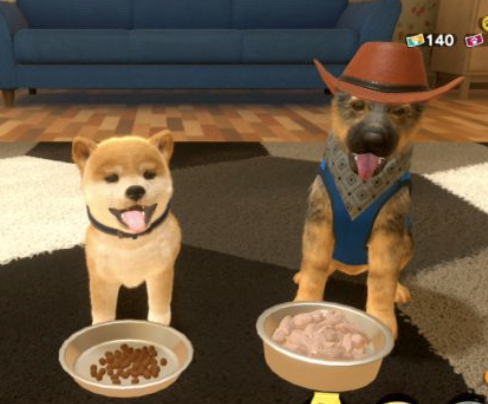

In [ ]:
dog_1 = {'name': '밍키',
         'age': 4}
dog_2 = {'name': '본드',
         'age': 7}

def eat(dogs):
    """dogs 들이 밥을먹는 행동을 처리하는 함수"""
def sit(dogs):
    """dogs 들이 앉는 행동을 처리하는 함수"""


속성과 관련된 정보와 행동과 관련된 함수가 제각각 분리되어  
하나의 개념으로 모여있지 않습니다. -> 프로그램 제작과  
유지보수가 어려워 집니다.

#### OOP를 사용하면

class 로 만들어 주면   

프로그램 속에서 현실의 강아지의 개념/의미를 가진 객체를 만들 수 있습니다.

In [ ]:
class Dog:
    """개를 클래스를 이용해 프로그래밍"""

    def __init__(self, name, age):
        """name과 age 속성을 초기화하는 생성자"""
        self.name = name
        self.age = age

    def sit(self):
        """앉는 행동을 처리 하는 메서드"""
        print(f'{self.name} : 바닥에 앉았습니다.')

    def eat(self):
        """먹는 행동을 처리 하는 메서드"""
        print(f'{self.name} : 밥을 먹습니다.')

- 클래스를 이용하면 속성과 행동을 하나로 만들어 줄 수 있습니다.
- 프로그램을 만들기도 이해하기도 쉬워지고, 유지보수도 편해집니다.

### 클래스로 객체 만들기

In [ ]:
my_dog = Dog('흰둥이', 3)

- 이렇게 만들어진 객체 my_dog를 Dog클래스의 인스턴스(instance)라고 합니다.

객체의 속성

In [ ]:
print(f'내 강아지의 이름은 {my_dog.name} 입니다.')
print(f'나이는 {my_dog.age}살 입니다.')

객체의 메서드

In [ ]:
my_dog.sit()
my_dog.eat()

객체의 인스턴스 만들기

In [ ]:
my_dog = Dog('흰둥이', 3)
your_dog = Dog('쵸비', 12)

print(f'내 강아지는 {my_dog.name} 입니다.')
print(f'너의 강아지는 {your_dog.name} 입니다.')

#### ❓ 클래스를 만들어 봅시다.
- 자동차 Car 클래스를 만들고
- 자동차의 모델명과 생산년도를 속성 self.model, self.year로 추가해보세요

## 객체의 생성과 소멸

In [ ]:
class Car:
""" 자동차를 표현하는 클래스 """

    def __init__(self, model, year):  # 객체를 생성할 때 호출
        self.model = model
        self.year = year
        print(f'자동차 {self.model} 생성됬습니다.')

my_car = Car('그랜져', '2023')


In [ ]:
class Car:
    # --생략--

    def __del__(self):  # 객체가 삭제될 때 호출
        print(f'자동차 {self.model} 폐차 됬습니다ㅠㅠ')

del my_car

## 객체와 인스턴스 속성, 메서드 다루기

- 속성 다루기

생성할 때 속성의 기본값을 직접 만들수도 있습니다.

In [ ]:
class Car:

    def __init__(self, model, year):
        self.model = model
        self.year = year
        self.number = "임시번호판"


In [ ]:
my_car = Car()

In [ ]:
print(my_car.model, my_car.number)

속성 값 직접 변경하기

In [ ]:
my_car.number = "55라1234"

In [ ]:
my_car.number

- 메서드 만들기

속성값들을 출력하는 메서드

In [ ]:
class Car:

    def __init__(self, model, year):
        self.model = model
        self.year = year
        self.number = "임시번호판"

    def describe_info(self):
        print(f'차량번호 : {self.number}, 연식 : {self.year}, 모델명 : {self.model}')

my_car = Car('그랜져', 2017)


In [ ]:
my_car.describe_info()

- 속성 값 메서드로 변경하기

#### ❓ 클래스의 메서드를 추가해 봅시다.
- 자동차 Car의 메서드로 차량번호를 받아 변경하는   
change_number() 메서드를 만들어 보세요

In [ ]:
class Car:

    def __init__(self, model, year):
        self.model = model
        self.year = year
        self.number = "임시번호판"

    def describe_info(self):
        print(f'차량번호 : {self.number}, 연식 : {self.year}, 모델명 : {self.model}')

    def change_number(self, number):
        self.number = number

In [ ]:
my_car = Car('그랜져', 2017)
my_car.change_number("23호4021")
my_car.describe_info()

차량번호 : 23호4021, 연식 : 2017, 모델명 : 그랜져


## 클래스메서드 , 정적 메서드

클래스 메서드는 클래스 정보를 매개변수로 받아 처리할 수 있습니다.


In [ ]:
class Car:
    factory = '소하리공장'
    maker = 'KIA'
    def __init__(self, model, year):
        self.model = model
        self.year = year
        self.number = "임시번호판"

    def describe_info(self):
        print(f'차량번호 : {self.number}, 연식 : {self.year}, 모델명 : {self.model}')

    def change_number(self, number):
        self.number = number

    @classmethod
    def describe_maker(cls):
        print(f'{cls.maker}의 {cls.factory} 차량입니다.')

    @staticmethod
    def greeting():
        print("오늘도 안전운전 하세요")

car_1 = Car('K3', 2015)
car_2 = Car('EV6', 2022)

In [ ]:
car_1.describe_maker()

KIA의 Sohari공장 차량입니다.


In [ ]:
car_2.describe_maker()

KIA의 Sohari공장 차량입니다.


정적메서드는 클래스나 인스턴스 정보가 필요없는 함수 입니다.

In [ ]:
class Car:
    # -- 생략 --
    @classmethod
    def describe_maker(cls):
        print(f'{cls.maker}의 {cls.factory} 차량입니다.')

    @staticmethod
    def greeting():
        print("오늘도 안전운전 하세요")

In [ ]:
car_3 = Car('Carnival', 2020)

In [ ]:
car_3.greeting()

오늘도 안전운전 하세요


## 상속

기존의 클래스를 세분화하여 새로운 클래스를 만들 때 기존의 클래스의 내용을 상속받을 수 있습니다.  

### 슈퍼클래스 / 서브클래스
      
Car : 슈퍼클래스 (부모클래스)  
ElectricCar : 서브클래스 (자식클래스)

In [ ]:
class ElectricCar(Car):
    """ Car를 상속받는 전기차 클래스 """

    def __init__(self, model, year):
        super().__init__(model, year)
        battery = 100

my_ev = ElectricCar('EV9', 2023)

In [ ]:
my_ev.describe_maker()

KIA의 소하리공장 차량입니다.


In [ ]:
my_ev.describe_info()

차량번호 : 임시번호판, 연식 : 2023, 모델명 : EV9


### 메서드 오버라이딩 (Overrideing)

부모 클래스의 메서드와 같은이름으로 메서드를 만들면  
자식클래스에서 메서드를 재정의 해줄 수 있고 이를 오버라이딩이라고 합니다.

In [ ]:
class ElectricCar(Car):
    """ Car를 상속받는 전기차 클래스 """

    def __init__(self, model, year):
        super().__init__(model, year)
        self.battery = 100

    def describe_info(self):
        print(f'차량번호 : {self.number}, 연식 : {self.year}, '
              f'모델명 : {self.model}, 잔여배터리 : {self.battery}')

In [ ]:
my_ev = ElectricCar('EV9', 2023)

In [ ]:
my_ev.describe_info()

'KIA'

# 클래스 임포트 하기

클래스도 함수와 마찬가지로 모듈로 저장하여  
다른 소스코드에서 임포트 할 수 있습니다.

Car, ElectricCar 클래스를 car_module.py 소스파일 안에 복사하여 저장  
다른 소스코드 파일에서 아래처럼 import

- 모듈 이름으로 import

In [ ]:
import car_module

In [ ]:
my_car = car_module.Car('소나타', '2015')
my_car.describe_info()

my_ev_car = car_module.ElectricCar('EV6', '2022')

- 클래스 이름으로 import

In [ ]:
from car_module import Car

my_car = Car('그랜져', '2020')  # 클래스 이름을 import 하면 모듈명은 필요없음

- 여러 클래스 임포트하기

In [ ]:
from car_module import Car, ElectricCar

- 전부다 임포트하기

In [ ]:
from car_module import *

- 별칭 사용하기

In [ ]:
from car_module import ElectricCar as EC

In [ ]:
import car_module as car